In [1]:
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
class TimeSeriesData():
    
    def __init__(self, num_points, xmin, xmax):
        self.xmin = xmin
        self.xmax = xmax 
        self.num_points = num_points
        self.resolution = (xmax-xmin)/num_points
        self.x_data  = np.linspace(xmin, xmax, num_points)
        self.y_true = np.sin(self.x_data)
    
    #To compare data which we dont have 
    def ret_true(self, x_series):
        return np.sin(x_series)
    
    def nxt_batch(self, batch_size, steps, return_batch_ts = False):
        
        #Get a random starting point to the batch size 
        rand_start = np.random.rand(batch_size, 1)
        
        #Make the point fall on the time series
        ts_start  = rand_start * (self.xmax - self.xmin - (steps * self.resolution))
        
        #Create a batch of data
        batch_ts = ts_start + np.arange(0.0, steps + 1) * self.resolution
        
        y_batch = np.sin(batch_ts)
        
        if return_batch_ts:
            return y_batch[:,:-1].reshape(-1,steps,1), y_batch[:,1:].reshape(-1,steps,1), batch_ts
        else:
            return y_batch[:,:-1].reshape(-1,steps,1), y_batch[:,1:].reshape(-1,steps,1)
        

In [7]:
ts_data = TimeSeriesData(250, 0, 10)

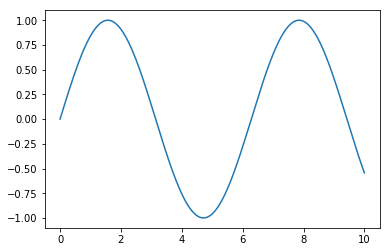

In [8]:
plt.plot(ts_data.x_data, ts_data.y_true)

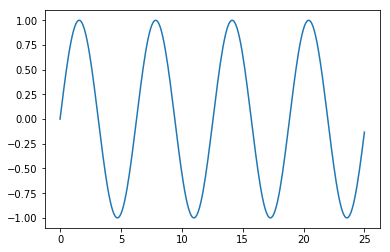

In [9]:
ts_data = TimeSeriesData(250, 0, 25)
plt.plot(ts_data.x_data, ts_data.y_true)

In [10]:
num_steps = 30
y1, y2, ts = ts_data.nxt_batch(1, num_steps,True)

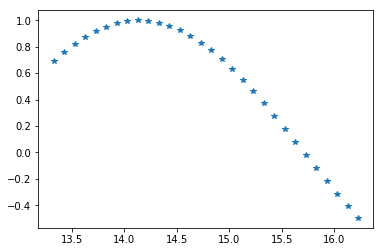

In [18]:
plt.plot(ts.flatten()[1:,],y2.flatten(), '*' )